# Agglomerative Clustering

In [18]:
# imports
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

### Dataset

In [19]:
columns = ['area','perimeter','compactness','length','width','asymmetry','groove','class']
df = pd.read_csv("seeds_dataset.txt", names=columns, delimiter='\s+')
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Standarize data

In [20]:
X = df[columns[:-1]]
labels = df[columns[-1]]

In [21]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

### Agglomerative Clustering

In [22]:
min_clusters = 3
max_clusters = 50
# Indices
n_clust = [i for i in range(min_clusters,max_clusters+1)]
# Columnas
list_linkage = ['single', 'complete', 'average', 'ward']

In [23]:
# Final dataframe with accuracy scores
final = pd.DataFrame(np.zeros((len(n_clust),len(list_linkage))), columns=list_linkage)
final.columns.name = 'LINKAGE'
final.index = n_clust
final.index.name = 'n_clusters'

In [24]:
for i in range(len(list_linkage)):
    
    results_col = []
    
    for c in range(min_clusters, max_clusters+1):
        # Creation
        clt = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage=list_linkage[i])
        
        # Train & Preditc
        clusters = clt.fit_predict(X_std)
        
        # Moda
        moda = -1 + np.zeros(c).astype(int)
        aciertos = 0
        
        # Computo moda muestras y numero de aciertos
        for k in range(c):
            moda[k] = np.bincount(labels[clusters==k]).argmax()
            aciertos += np.sum(labels[clusters==k] == moda[k])
            
        # Accuracy
        accu = aciertos / labels.shape[0]
        
        results_col.append(accu)
        
    # Write in final dataframe
    final.loc[:, final.keys()[i]] = results_col

# Results
final

LINKAGE,single,complete,average,ward
n_clusters,,,,
3,0.347619,0.876190,0.880952,0.928571
4,0.352381,0.876190,0.880952,0.928571
5,0.357143,0.876190,0.880952,0.928571
6,0.357143,0.876190,0.880952,0.928571
7,0.361905,0.876190,0.890476,0.928571
8,0.361905,0.876190,0.890476,0.928571
9,0.366667,0.900000,0.890476,0.928571
10,0.376190,0.928571,0.890476,0.928571
11,0.380952,0.928571,0.890476,0.928571


### Numero de clusters optimos para cada metodo de montaje

In [25]:
for i in range(len(list_linkage)):
    opt_clust = final[list_linkage[i]].idxmax()
    print("Para el metodo de montaje",'\033[1m' + list_linkage[i] + '\033[0m', "el numero de clusters optimo es:", '\033[1m' + str(opt_clust) + '\033[0m')

Para el metodo de montaje single el numero de clusters optimo es: 50
Para el metodo de montaje complete el numero de clusters optimo es: 43
Para el metodo de montaje average el numero de clusters optimo es: 45
Para el metodo de montaje ward el numero de clusters optimo es: 48


### Barchar

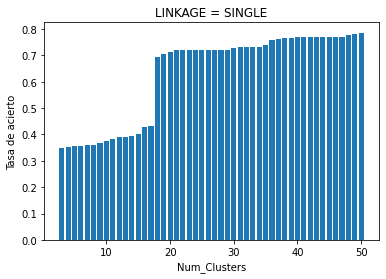

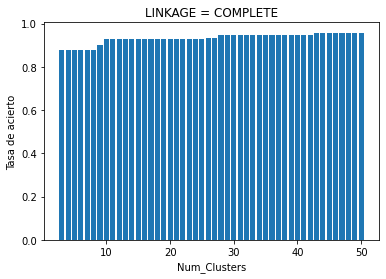

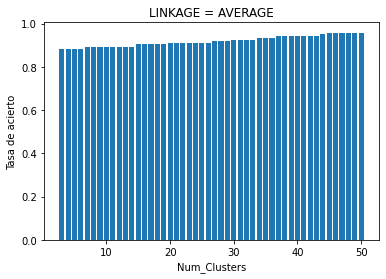

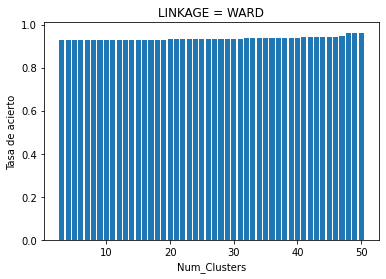

In [26]:
# SINGLE
plt.figure()
plt.title("LINKAGE = SINGLE")
plt.bar(n_clust,final['single'])
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()

# COMPLETE
plt.figure()
plt.title("LINKAGE = COMPLETE")
plt.bar(n_clust,final['complete'])
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()

# AVERAGE
plt.figure()
plt.title("LINKAGE = AVERAGE")
plt.bar(n_clust,final['average'])
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()

# WARD
plt.figure()
plt.title("LINKAGE = WARD")
plt.bar(n_clust,final['ward'])
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()